In [1]:
# Author Davide Aloi
# Scripts for the analyses of the EEG data (active task) collected at the Wellington Hospital - Aloi Davide PhD UoB

import numpy as np
import mne
import os
import glob 
import matplotlib.pyplot as plt
from preprocessing.preprocess import preprocess 

mne.set_log_level("WARNING")

# Folders to the EEG active task data
output_folder = 'D:\\Raindrop_eeg_analysis\\p01\\'
sessions = ['D:\\Raindrop_data\\p01\\p01_w01\\eeg_baseline\\active_task\\', # baseline w 1
            'D:\\Raindrop_data\\p01\\p01_w02\\day04_eeg\\active_task\\', # post w 2
            'D:\\Raindrop_data\\p01\\p01_w03\\eeg_baseline\\active_task\\', # baseline w 3
            'D:\\Raindrop_data\\p01\\p01_w04\\day04_eeg\\active_task\\', # post w 4
            'D:\\Raindrop_data\\p01\\p01_w05\\eeg_baseline\\active_task\\', # baseline w5
            'D:\\Raindrop_data\\p01\\p01_w06\\day04_eeg\\active_task\\'] # post w6

# Paths to .mff files
sessions_raw = []
for n, session in enumerate(sessions):
    sessions_raw.append(glob.glob(session + '\*.mff')[0])

In [2]:
raw = mne.io.read_raw_egi(sessions_raw[0], preload=True)
picks_eeg = mne.pick_types(raw.info, meg=False, eeg=True, eog=True, stim=False)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Preprocessing session: p01_w01
Results will be saved in folder: D:\Raindrop_eeg_analysis\p01\
Montage: GSN-HydroCel-128
Filtering data (1 - 40Hz. Mon Jul  4 10:22:12 2022)
Filtering Done. Mon Jul  4 10:22:16 2022
Setting reference: average
72 events found
Event IDs: [1 2]
Epoching data: -1s - 3s.
Detecting bad channels with Ransac. Mon Jul  4 10:22:18 2022


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   21.7s remaining:  1.1min
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:   21.8s remaining:   36.4s
[Parallel(n_jobs=8)]: Done   4 out of   8 | elapsed:   22.1s remaining:   22.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   22.2s remaining:   13.3s
[Parallel(n_jobs=8)]: Done   6 out of   8 | elapsed:   22.7s remaining:    7.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   23.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   23.1s finished


Bad channels detected: 34
['E3', 'E9', 'E12', 'E13', 'E20', 'E30', 'E31', 'E36', 'E37', 'E42', 'E45', 'E53', 'E54', 'E55', 'E60', 'E61', 'E62', 'E66', 'E67', 'E72', 'E77', 'E79', 'E80', 'E86', 'E87', 'E92', 'E93', 'E99', 'E104', 'E105', 'E106', 'E112', 'E126', 'E129']
Bad channels based on z-point > 3.0, Mon Jul  4 10:22:42 2022
Electrode 97 should be checked.
Bad channels with z > 3.0: 1
Electrodes: 
[97]
Bad epochs detection (autorject). Mon Jul  4 10:22:43 2022
Running autoreject on ch_type=eeg




Estimated consensus=0.50 and n_interpolate=4
Plot saved in: D:\Raindrop_eeg_analysis\p01\ p01_w01 _autoreject_before_ica.jpg
Epochs rejected: 9
Fitting ICA. Mon Jul  4 10:24:42 2022


KeyboardInterrupt: 

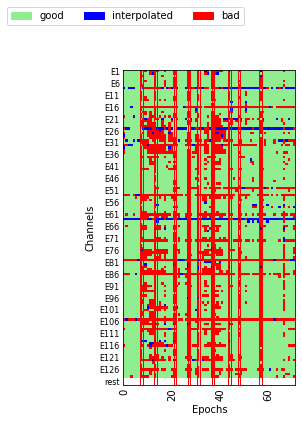

In [3]:
cleaned_epochs = preprocess('p01_w01','D:\\Raindrop_eeg_analysis\\p01\\', raw, 'GSN-HydroCel-128', 'average',
                            'STI 014', picks_eeg, events_id = dict(move=1,relax=2), tmin = -1, tmax = 3,
                            baseline = (-800,-200), save = True)